<a href="https://colab.research.google.com/github/iam-fern/Generate_addition/blob/main/GQtest_cluster_data(y_hat)_add_delta_(_4)_n250_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_addition/addition_delta_-4'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_-4_n250.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,73.189801,75.092578,41.077007,-0.000135,199.359251,199.359395,-0.000145
1,0.0,1.0,86.527001,51.672083,75.656823,0.000052,223.855959,223.855922,0.000037
2,0.0,2.0,78.702950,29.733054,57.447595,-0.002263,175.881336,175.883681,-0.002345
3,0.0,3.0,36.026108,43.767887,23.702221,-0.000029,113.496186,113.496349,-0.000163
4,0.0,4.0,30.132667,51.054562,76.877885,0.000132,168.065246,168.065205,0.000041
...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,94.346602,77.500966,21.159388,-0.000176,203.006780,203.006879,-0.000099
249996,999.0,246.0,89.803533,46.001564,89.412876,-0.000295,235.217679,235.217840,-0.000161
249997,999.0,247.0,77.315993,56.194500,34.467630,0.000104,177.978226,177.978065,0.000162
249998,999.0,248.0,99.632091,81.349368,30.222691,-0.000055,221.204096,221.204055,0.000040


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3         e           Y  \
rep   index                                                          
0.0   0.0    73.189801  75.092578  41.077007 -0.000135  199.359251   
      1.0    86.527001  51.672083  75.656823  0.000052  223.855959   
      2.0    78.702950  29.733054  57.447595 -0.002263  175.881336   
      3.0    36.026108  43.767887  23.702221 -0.000029  113.496186   
      4.0    30.132667  51.054562  76.877885  0.000132  168.065246   
...                ...        ...        ...       ...         ...   
999.0 245.0  94.346602  77.500966  21.159388 -0.000176  203.006780   
      246.0  89.803533  46.001564  89.412876 -0.000295  235.217679   
      247.0  77.315993  56.194500  34.467630  0.000104  177.978226   
      248.0  99.632091  81.349368  30.222691 -0.000055  221.204096   
      249.0  62.732719  45.022952  38.522189 -0.000458  156.277402   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    199.359395 -0.000145  
      1.0    223.855922  0.000037  
      2.0    175.883681 -0.002345  
      3.0    113.496349 -0.000163  
      4.0    168.065205  0.000041  
...                 ...       ...  
999.0 245.0  203.006879 -0.000099  
      246.0  235.217840 -0.000161  
      247.0  177.978065  0.000162  
      248.0  221.204055  0.000040  
      249.0  156.277829 -0.000427  

[250000 rows x 7 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3         e           Y  \
rep   index                                                          
0.0   0.0    73.189801  75.092578  41.077007 -0.000135  199.359251   
      1.0    86.527001  51.672083  75.656823  0.000052  223.855959   
      2.0    78.702950  29.733054  57.447595 -0.002263  175.881336   
      3.0    36.026108  43.767887  23.702221 -0.000029  113.496186   
      4.0    30.132667  51.054562  76.877885  0.000132  168.065246   
...                ...        ...        ...       ...         ...   
999.0 245.0  94.346602  77.500966  21.159388 -0.000176  203.006780   
      246.0  89.803533  46.001564  89.412876 -0.000295  235.217679   
      247.0  77.315993  56.194500  34.467630  0.000104  177.978226   
      248.0  99.632091  81.349368  30.222691 -0.000055  221.204096   
      249.0  62.732719  45.022952  38.522189 -0.000458  156.277402   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    199.359395 -0.000145  
      1.0    223.855922  0.000037  
      2.0    175.883681 -0.002345  
      3.0    113.496349 -0.000163  
      4.0    168.065205  0.000041  
...                 ...       ...  
999.0 245.0  203.006879 -0.000099  
      246.0  235.217840 -0.000161  
      247.0  177.978065  0.000162  
      248.0  221.204055  0.000040  
      249.0  156.277829 -0.000427  

[250000 rows x 7 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,73.189801,75.092578,41.077007,-0.000135,199.359251,199.359395,-0.000145
1,0.0,1.0,86.527001,51.672083,75.656823,0.000052,223.855959,223.855922,0.000037
2,0.0,2.0,78.702950,29.733054,57.447595,-0.002263,175.881336,175.883681,-0.002345
3,0.0,3.0,36.026108,43.767887,23.702221,-0.000029,113.496186,113.496349,-0.000163
4,0.0,4.0,30.132667,51.054562,76.877885,0.000132,168.065246,168.065205,0.000041
...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,94.346602,77.500966,21.159388,-0.000176,203.006780,203.006879,-0.000099
249996,999.0,246.0,89.803533,46.001564,89.412876,-0.000295,235.217679,235.217840,-0.000161
249997,999.0,247.0,77.315993,56.194500,34.467630,0.000104,177.978226,177.978065,0.000162
249998,999.0,248.0,99.632091,81.349368,30.222691,-0.000055,221.204096,221.204055,0.000040


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         x2         x3         e           Y  \
rep   index                                                          
0.0   0.0    73.189801  75.092578  41.077007 -0.000135  199.359251   
      1.0    86.527001  51.672083  75.656823  0.000052  223.855959   
      2.0    78.702950  29.733054  57.447595 -0.002263  175.881336   
      3.0    36.026108  43.767887  23.702221 -0.000029  113.496186   
      4.0    30.132667  51.054562  76.877885  0.000132  168.065246   
...                ...        ...        ...       ...         ...   
999.0 245.0  94.346602  77.500966  21.159388 -0.000176  203.006780   
      246.0  89.803533  46.001564  89.412876 -0.000295  235.217679   
      247.0  77.315993  56.194500  34.467630  0.000104  177.978226   
      248.0  99.632091  81.349368  30.222691 -0.000055  221.204096   
      249.0  62.732719  45.022952  38.522189 -0.000458  156.277402   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    199.359395 -0.000145  
      1.0    223.855922  0.000037  
      2.0    175.883681 -0.002345  
      3.0    113.496349 -0.000163  
      4.0    168.065205  0.000041  
...                 ...       ...  
999.0 245.0  203.006879 -0.000099  
      246.0  235.217840 -0.000161  
      247.0  177.978065  0.000162  
      248.0  221.204055  0.000040  
      249.0  156.277829 -0.000427  

[250000 rows x 7 columns]

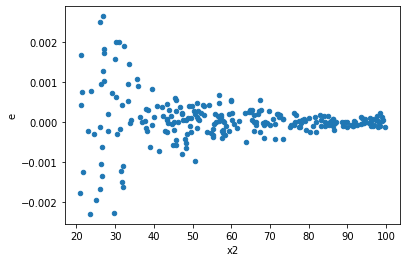

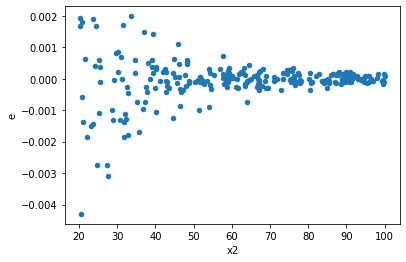

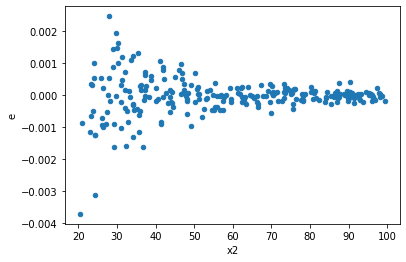

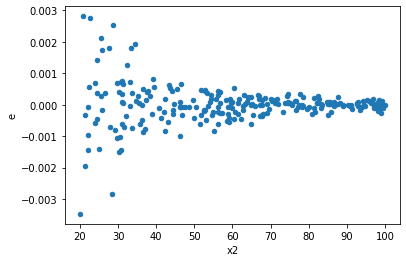

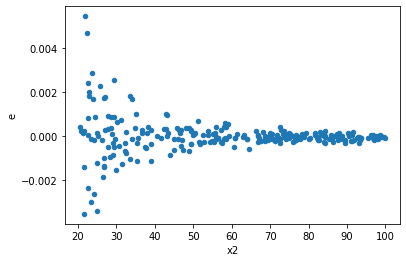

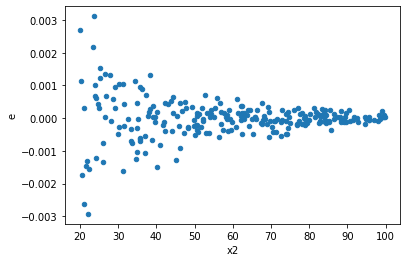

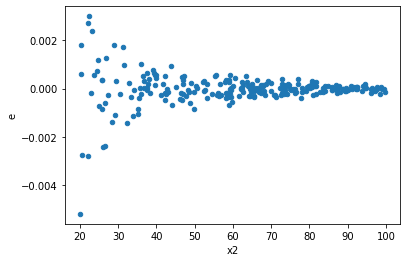

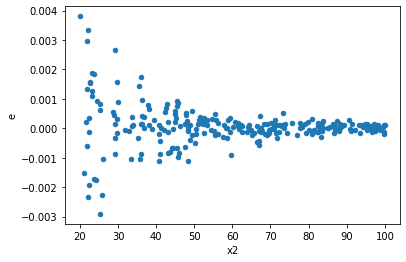

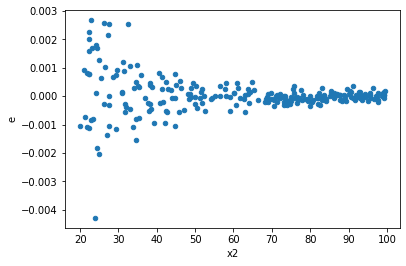

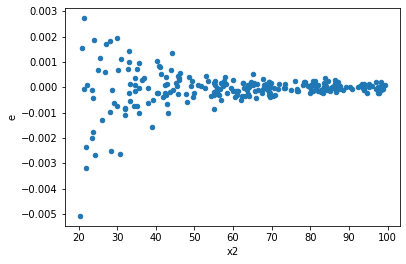

In [11]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["y_hat"]]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,129.0,115.0,1.1809255466356385e-05,7.770003918000397e-05,9.154461601826656e-08,6.756525146087302e-07,7.380581666036072,2.220446049250313e-16,0.9999999999999999,1.1102230246251565e-16,Reject005=0 : Heteroscedasticity
1.0,107.0,137.0,3.875492193117787e-05,7.411020518260186e-05,3.6219553206708294e-07,5.409504027927143e-07,1.4935314074844077,0.026945165994987974,0.986527417002506,0.013472582997493987,Reject005=0 : Heteroscedasticity
2.0,121.0,123.0,2.042906571078398e-05,6.803160618190838e-05,1.6883525380813207e-07,5.53102489283808e-07,3.2759893257386,1.8641310717271153e-10,0.9999999999067934,9.320655358635577e-11,Reject005=0 : Heteroscedasticity
4.0,96.0,148.0,1.4334348103484028e-05,0.0001696734934449608,1.4931612607795863e-07,1.1464425232767622e-06,7.6779551773142,2.220446049250313e-16,0.9999999999999999,1.1102230246251565e-16,Reject005=0 : Heteroscedasticity
6.0,131.0,113.0,1.9776956962018558e-05,9.642874856907277e-05,1.5096913711464549e-07,8.533517572484316e-07,5.652491453272326,2.220446049250313e-16,0.9999999999999999,1.1102230246251565e-16,Reject005=0 : Heteroscedasticity
7.0,111.0,133.0,3.0125474357237267e-05,9.263921041714868e-05,2.714006698850204e-07,6.965354166702908e-07,2.566446932372642,2.497051407868156e-07,0.9999998751474296,1.248525703934078e-07,Reject005=0 : Heteroscedasticity
9.0,142.0,102.0,5.4941538844658944e-05,6.802944354693403e-05,3.8691224538492216e-07,6.669553288915101e-07,1.7237896625059907,0.003846581634626478,0.9980767091826868,0.001923290817313239,Reject005=0 : Heteroscedasticity
12.0,129.0,115.0,9.743550653242494e-06,4.1393220008358416e-05,7.553140041273251e-08,3.5994104355094274e-07,4.765449092484542,6.661338147750939e-16,0.9999999999999997,3.3306690738754696e-16,Reject005=0 : Heteroscedasticity
14.0,133.0,111.0,9.018733070099246e-06,6.61633155028278e-05,6.781002308345298e-08,5.960659054308811e-07,8.790233041173131,2.220446049250313e-16,0.9999999999999999,1.1102230246251565e-16,Reject005=0 : Heteroscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,129.0,115.0,1.1809255466356385e-05,7.770003918000397e-05,9.154461601826656e-08,6.756525146087302e-07,7.380581666036072,2.220446049250313e-16,Reject005=0 : Heteroscedasticity
1.0,107.0,137.0,3.875492193117787e-05,7.411020518260186e-05,3.6219553206708294e-07,5.409504027927143e-07,1.4935314074844077,0.026945165994987974,Reject005=0 : Heteroscedasticity
2.0,121.0,123.0,2.042906571078398e-05,6.803160618190838e-05,1.6883525380813207e-07,5.53102489283808e-07,3.2759893257386,1.8641310717271153e-10,Reject005=0 : Heteroscedasticity
3.0,141.0,103.0,8.524165326593112e-05,1.5615029881584527e-05,6.045507323824902e-07,1.5160223186004396e-07,0.250768419819112,5.554215736245664e-14,Reject005=0 : Heteroscedasticity
4.0,96.0,148.0,1.4334348103484028e-05,0.0001696734934449608,1.4931612607795863e-07,1.1464425232767622e-06,7.6779551773142,2.220446049250313e-16,Reject005=0 : Heteroscedasticity
5.0,117.0,127.0,7.258735946731094e-05,2.1807636232938366e-05,6.204047817718884e-07,1.7171367112549894e-07,0.2767768337231078,1.08686322010622e-11,Reject005=0 : Heteroscedasticity
6.0,131.0,113.0,1.9776956962018558e-05,9.642874856907277e-05,1.5096913711464549e-07,8.533517572484316e-07,5.652491453272326,2.220446049250313e-16,Reject005=0 : Heteroscedasticity
7.0,111.0,133.0,3.0125474357237267e-05,9.263921041714868e-05,2.714006698850204e-07,6.965354166702908e-07,2.566446932372642,2.497051407868156e-07,Reject005=0 : Heteroscedasticity
8.0,110.0,134.0,9.353082935504e-05,1.8023891749850215e-05,8.50280266864e-07,1.3450665484962848e-07,0.15819096372272093,1.8461650769885626e-20,Reject005=0 : Heteroscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject005=0 : Heteroscedasticity    981
Reject005=1 : Homoscedasticity       19
Name: Result_test, dtype: int64